In [2]:
from dpks.quant_matrix import QuantMatrix

/home/aaron/miniconda3/envs/DPKS/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/aaron/miniconda3/envs/DPKS/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimizat

In [3]:
qm = QuantMatrix(
    quantification_file="../tests/input_files/data_sepsis.tsv",
    design_matrix_file="../tests/input_files/design_sepsis.tsv")


In [4]:
quantified_data = (
    qm.normalize(
        method="mean",
    )
    .quantify(method="top_n", summarization_method="mean")
)

In [8]:
import xgboost

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#clf = xgboost.XGBClassifier()
#clf = KNeighborsClassifier()
clf = DecisionTreeClassifier()

quantified_data.rank(
    clf,
    verbose=True,
    threads=4
)

Fitting initial selector.


TypeError: bad operand type for abs(): 'list'

In [5]:
quantified_data.to_df().sort_values("FeatureRank")

,Protein,FeatureRank,TM_P1911_190,TM_P1911_191,TM_P1911_192,TM_P1911_193,TM_P1911_194,TM_P1911_196,TM_P1911_197,TM_M2012_010,...,TM_M2012_190,TM_M2012_191,TM_M2012_192,TM_M2012_196,TM_M2012_197,TM_M2012_198,TM_M2012_199,TM_M2012_200,TM_M2012_202,TM_M2012_203
232,P59665,1,24.085189,24.262046,23.991617,24.287740,24.008942,23.486835,23.267737,22.116615,...,23.391273,23.092243,23.008705,27.251451,26.952818,26.774372,26.392491,26.318986,25.286124,25.544700
41,P06727,2,25.247323,26.478251,26.742435,27.132624,27.114015,27.205377,27.467179,25.911132,...,23.607818,23.294671,24.118629,25.466644,25.288341,25.613842,26.665226,27.174316,27.263428,27.637668
63,P19827,3,23.863344,23.743491,23.502584,23.545151,23.746381,24.548924,24.629697,25.048454,...,24.870521,24.824668,24.820074,25.185408,25.080742,25.107978,25.107001,24.775316,25.135377,24.397868
499,P18428,4,25.617077,26.676823,26.969565,26.262587,26.105181,25.687207,24.600110,24.034007,...,23.516304,23.487916,23.385347,24.607840,24.136473,24.642995,24.925651,24.927074,24.452567,24.645567
438,P01614,5,26.027514,25.809900,25.978309,26.130335,25.766240,25.800238,26.586970,25.560379,...,23.931119,23.749748,23.683309,26.773815,24.394937,24.562484,24.797084,24.775502,24.498690,24.460444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,P37802,550,16.157251,17.184952,16.367406,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,17.684197,18.496476,18.311377,18.051446,0.000000,0.000000,0.000000
278,P00338,551,18.116874,18.869019,18.368997,18.725882,19.105898,18.713899,19.414175,16.868229,...,18.499027,18.162369,18.072094,21.324266,22.220417,23.646134,24.163463,23.632464,20.699358,22.146348
275,Q9H4B7,552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.523475,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
277,P14314,553,0.000000,18.814089,18.352072,18.726841,18.544580,0.000000,16.940094,0.000000,...,0.000000,0.000000,0.000000,16.858465,18.853502,20.209992,20.982504,20.928801,19.709070,20.425495


In [6]:
trained_classifier = quantified_data.train(
    clf
)

In [7]:
trained_classifier.validation_results

array([0.925     , 0.95      , 0.84615385, 0.58974359, 0.82051282])

In [8]:
quantified_data.predict(
    trained_classifier.esimator_,
    trained_classifier.scaler
)

In [9]:
quantified_data.interpret(
    trained_classifier.esimator_,
    trained_classifier.scaler
)

In [11]:
quantified_data.to_df().sort_values("SHAP", ascending=False)

,Protein,FeatureRank,SHAP,TM_P1911_190,TM_P1911_191,TM_P1911_192,TM_P1911_193,TM_P1911_194,TM_P1911_196,TM_P1911_197,...,TM_M2012_190,TM_M2012_191,TM_M2012_192,TM_M2012_196,TM_M2012_197,TM_M2012_198,TM_M2012_199,TM_M2012_200,TM_M2012_202,TM_M2012_203
232,P59665,1,1.244313,24.085189,24.262046,23.991617,24.287740,24.008942,23.486835,23.267737,...,23.391273,23.092243,23.008705,27.251451,26.952818,26.774372,26.392491,26.318986,25.286124,25.544700
148,P08571,7,0.550133,22.810171,22.832144,22.666706,23.167450,23.107058,22.287125,21.830566,...,21.448131,21.393550,21.387047,21.746426,22.286750,23.003825,23.521602,23.391741,23.181335,23.002951
41,P06727,2,0.469053,25.247323,26.478251,26.742435,27.132624,27.114015,27.205377,27.467179,...,23.607818,23.294671,24.118629,25.466644,25.288341,25.613842,26.665226,27.174316,27.263428,27.637668
314,Q9HDC9,10,0.368035,20.031998,19.504701,18.549798,18.775443,18.710181,20.033372,18.596089,...,19.132102,18.891535,18.848783,19.884486,19.284978,19.924788,20.009152,19.753445,17.483062,19.076257
63,P19827,3,0.328179,23.863344,23.743491,23.502584,23.545151,23.746381,24.548924,24.629697,...,24.870521,24.824668,24.820074,25.185408,25.080742,25.107978,25.107001,24.775316,25.135377,24.397868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Q03591,428,0.000000,23.144332,23.217649,23.086392,23.353070,23.511194,23.348752,22.813376,...,22.988070,22.989593,23.181493,22.946587,22.451354,22.801858,22.807884,22.942252,24.651920,23.280699
192,P08779,426,0.000000,0.000000,20.245058,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
190,P02790,421,0.000000,28.418228,28.476434,28.161990,28.466890,28.469522,28.608218,28.722504,...,29.001606,29.181823,29.084768,28.634428,28.346540,28.294244,27.720386,26.921510,27.852822,27.347519
189,P01860,420,0.000000,31.160901,31.089747,30.957740,30.915871,31.006104,31.108829,31.474324,...,28.684634,28.689796,28.794903,28.657779,29.148215,29.408678,29.544793,29.385379,29.119261,29.059704


In [12]:
param_grid = {
        'min_child_weight': [0.01, 0.1, 0.5, 1, 5, 10, 25],
        'gamma': [0.1, 0.5, 1, 1.5, 2, 5, 7, 10],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5, 6, 7,8,9,10,12,15,20],
        'max_leaves': [1, 2,3,4,5,6,7,8,9,10,15,20,25,30],
        "learning_rate": [0.0001,0.001, 0.01, 0.1, 1],
        "reg_alpha": [1e-10, 1e-7, 1e-6, 1e-5, 1e-2, 0.1, 1, 10, 15, 20,40, 60, 100],
        "reg_lambda": [1e-5, 1e-2, 0.1, 1, 5, 15, 20, 25, 100],
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 1000],
    'scale_pos_weight': [1, 3, 5, 7, 10, 15]
        }


In [15]:
optimized_model = quantified_data.optimize(
    xgboost.XGBClassifier(),
    param_search_method="genetic",
    verbose=True,
    param_grid=param_grid,
    threads=4,
    n_generations=5,
    pop_size=10,
    n_survive=5
)

Generation 0
Accuracy 0.8172494172494172
Best param {'min_child_weight': 1, 'gamma': 1.5, 'subsample': 0.7, 'colsample_bytree': 0.4, 'max_depth': 8, 'max_leaves': 5, 'learning_rate': 0.1, 'reg_alpha': 0.01, 'reg_lambda': 1, 'n_estimators': 500, 'scale_pos_weight': 15}
Generation 1
Accuracy 0.8172494172494172
Best param {'min_child_weight': 1, 'gamma': 1.5, 'subsample': 0.7, 'colsample_bytree': 0.4, 'max_depth': 8, 'max_leaves': 5, 'learning_rate': 0.1, 'reg_alpha': 0.01, 'reg_lambda': 1, 'n_estimators': 500, 'scale_pos_weight': 15}
Generation 2
Accuracy 0.8372183372183373
Best param {'min_child_weight': 1, 'gamma': 0.5, 'subsample': 0.9, 'colsample_bytree': 0.1, 'max_depth': 7, 'max_leaves': 4, 'learning_rate': 0.0001, 'reg_alpha': 1e-10, 'reg_lambda': 1e-05, 'n_estimators': 600, 'scale_pos_weight': 3}
Generation 3
Accuracy 0.8372183372183373
Best param {'min_child_weight': 1, 'gamma': 0.5, 'subsample': 0.9, 'colsample_bytree': 0.1, 'max_depth': 7, 'max_leaves': 4, 'learning_rate': 0.0

<Axes: xlabel='generation', ylabel='scores'>

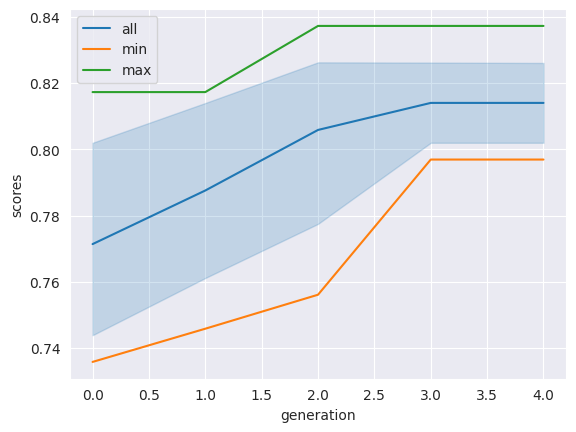

In [18]:
import pandas as pd
import seaborn as sns
populations = optimized_model.result
plot_dict = {'generation': [], 'scores' : []}
for generation in populations.keys():
    population = populations[generation]
    for individual in population:
        score, d = individual
        plot_dict['generation'].append(generation)
        plot_dict['scores'].append(score)

plot_frame = pd.DataFrame(plot_dict)
max_frame = plot_frame.groupby('generation', as_index=False).max()
min_frame = plot_frame.groupby('generation', as_index=False).min()
sns.lineplot(data=plot_frame, x='generation', y='scores', label='all')
sns.lineplot(data=min_frame, x='generation', y='scores', label='min')
sns.lineplot(data=max_frame, x='generation', y='scores', label='max')


In [9]:
quantified_data.to_df()

,Protein,SHAP,TM_P1911_190,TM_P1911_191,TM_P1911_192,TM_P1911_193,TM_P1911_194,TM_P1911_196,TM_P1911_197,TM_M2012_010,...,TM_M2012_190,TM_M2012_191,TM_M2012_192,TM_M2012_196,TM_M2012_197,TM_M2012_198,TM_M2012_199,TM_M2012_200,TM_M2012_202,TM_M2012_203
0,P08603,0.002284,27.917160,26.200732,25.975755,26.515251,26.439237,26.582008,26.533406,26.131857,...,26.737434,26.750760,26.771225,26.411031,26.442979,26.512285,26.672639,26.642845,27.336391,26.863229
1,P02671,0.000000,30.908137,30.832304,30.566479,30.734064,31.100094,30.182586,29.349591,29.288924,...,30.349528,30.275675,30.712801,28.009665,29.308227,29.345303,29.498104,30.048675,30.576106,29.977439
2,P01042,0.000000,25.364128,25.234319,25.136428,25.497528,25.650704,26.249714,26.467688,26.318449,...,26.105971,26.274201,26.120931,26.173301,26.105543,26.162973,26.179120,26.049352,27.268797,26.488321
3,P00450,0.004185,27.333235,27.645029,27.405650,27.461382,27.365972,27.385601,27.124483,26.753984,...,27.483159,27.586267,27.557639,27.014641,27.331685,27.714976,27.694537,27.852459,27.574303,27.613746
4,P05156,0.000000,23.451795,23.645933,23.349888,23.595948,23.729965,24.099617,24.086203,23.422044,...,23.862439,23.755281,23.964620,23.557492,23.183517,23.507872,23.519149,23.586519,24.327400,23.881691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,P07333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.562764,...,0.000000,0.000000,0.000000,18.512752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
550,Q06323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,17.150877,18.086225,0.000000,0.000000,19.517408,0.000000,17.283127
551,P16035,0.000000,0.000000,19.124122,20.428224,19.840918,20.065922,19.232781,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
552,O95633,0.000000,0.000000,0.000000,16.563512,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.054630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
quantified_data.rank(
    optimized_model.classifier,
    verbose=True,
    threads=4
)

Fitting initial selector.
Evaluating features below rank: 1
Model (1 features): 0.7766955266955267 0.009018759018759037
Evaluating features below rank: 2
Model (2 features): 0.812358276643991 0.03458049886621317
Evaluating features below rank: 3
Model (3 features): 0.740775097917955 0.06730571016285303
Evaluating features below rank: 4
Model (4 features): 0.8069470212327354 0.03143681715110286
Evaluating features below rank: 5
Model (5 features): 0.7914862914862915 0.07720057720057721
Evaluating features below rank: 6
Model (6 features): 0.8117913832199546 0.0770975056689342
Evaluating features below rank: 7
Model (7 features): 0.7865903937332509 0.041692434549577384
Evaluating features below rank: 8
Model (8 features): 0.735621521335807 0.08256029684601118
Evaluating features below rank: 9
Model (9 features): 0.7457225314368171 0.09266130694702124
Evaluating features below rank: 10
Model (10 features): 0.7710265924551638 0.10776128633271492
Evaluating features below rank: 11
Model (11

In [21]:
quantified_data.to_df().sort_values("FeatureRank")


,Protein,FeatureRank,SHAP,TM_P1911_190,TM_P1911_191,TM_P1911_192,TM_P1911_193,TM_P1911_194,TM_P1911_196,TM_P1911_197,...,TM_M2012_190,TM_M2012_191,TM_M2012_192,TM_M2012_196,TM_M2012_197,TM_M2012_198,TM_M2012_199,TM_M2012_200,TM_M2012_202,TM_M2012_203
232,P59665,1,1.244313,24.085189,24.262046,23.991617,24.287740,24.008942,23.486835,23.267737,...,23.391273,23.092243,23.008705,27.251451,26.952818,26.774372,26.392491,26.318986,25.286124,25.544700
63,P19827,2,0.328179,23.863344,23.743491,23.502584,23.545151,23.746381,24.548924,24.629697,...,24.870521,24.824668,24.820074,25.185408,25.080742,25.107978,25.107001,24.775316,25.135377,24.397868
536,P08637,3,0.262967,21.617900,21.506097,20.794574,20.885691,20.868956,20.754793,20.392221,...,20.117727,20.040763,19.874223,21.005429,20.810283,21.350849,21.325383,21.453609,21.635660,21.367490
41,P06727,4,0.469053,25.247323,26.478251,26.742435,27.132624,27.114015,27.205377,27.467179,...,23.607818,23.294671,24.118629,25.466644,25.288341,25.613842,26.665226,27.174316,27.263428,27.637668
35,P61626,5,0.151871,22.355805,23.075758,22.384013,22.476159,22.481354,22.626580,21.267674,...,20.617062,20.375671,20.380458,22.545407,21.573791,21.670793,21.509925,21.609480,21.836674,21.878319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,P37802,550,0.000000,16.157251,17.184952,16.367406,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,17.684197,18.496476,18.311377,18.051446,0.000000,0.000000,0.000000
276,P05062,551,0.000000,20.089825,21.629288,21.475172,21.352277,20.506893,20.143792,22.758690,...,0.000000,0.000000,0.000000,23.419459,24.690328,25.791556,26.306814,25.880947,23.080536,25.398776
275,Q9H4B7,552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
552,O95633,553,0.000000,0.000000,0.000000,16.563512,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.054630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
